<center><H1>Car Seats Data Set</H1></center><br><br>
<center><img src="https://www.toyota-boshoku.com/_assets/img/products/seat/seat/img1_01.jpg" width="400px" height="400px"></center>


 <center> <H3> In association with An Introduction to Statistical Learning: With Applications in R (ISLR V 2)  </H3></center>
  <center> <H4 style="color:blue;">  Answer for Applied <b>Question 10 of Chapter 03</b> </H4></center>


<H3> About the Data Set </H3><br>

**Description**
A simulated data set containing sales of child car seats at 400 different stores.

**Usage**
Carseats

**Format**
A data frame with **400 observations** on the following 11 variables.

1. Sales: Unit sales (in thousands) at each location
2. CompPrice: Price charged by competitor at each location
3. Income: Community income level (in thousands of dollars)
4. Advertising: Local advertising budget for company at each location (in thousands of dollars)
5. Population: Population size in region (in thousands)
6. Price: Price company charges for car seats at each site
7. ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age: Average age of the local population
9. Eduction: Education level at each location
10. Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US: A factor with levels No and Yes to indicate whether the store is in the US or not

**Source**
Simulated data

**References**
James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, https://www.statlearning.com, Springer-Verlag, New York

In [13]:
# caalling libraries
library(tidyr)


In [15]:
# load data set
Carseats = read.csv("/kaggle/input/carseats-data-r/dataset_car_seats.csv", header=TRUE,row.names="X")
dim(Carseats)

[1] 400  11

In [16]:
# omit nulls
Carseats <- na.omit(Carseats)
dim(Carseats)

[1] 400  11

In [17]:
# check for data types
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : int  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : int  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: int  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : int  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : int  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : chr  "Bad" "Good" "Medium" "Medium" ...
 $ Age        : int  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : int  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ US         : chr  "Yes" "Yes" "Yes" "Yes" ...


**(a) Fit a multiple regression model to predict Sales using Price,Urban, and US.**

In [18]:
model <- lm(Sales ~ Price+Urban+US, data = Carseats)

**(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

In [19]:
summary(model)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


1. **Price: -0.054459** --> When price increases by one unit while other independent variables remain constant, Sales amount drop by 0.05 units
2. **UrbanYes: -0.021916** --> If the store is in urban area the slaes amount drop by 0.02 units. But it seems not significant in predicting the sales amount as the p-valy is greater than 0.05.
3. **USYes: 1.200573** --> If the store is in US, while the other factors remain constant, sales amount increases by 1.1 units.

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

Sales = 13.043469 - 0.054459Price - 0.021916Urban + 1.200573US

Urban --> 0: if located in rural area, 1: if located in urban area
US --> 0: if located outside US, 1: if loctaed in US

**(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?**

* H0 - Coefficient value is equal to 0
* H1 - Coefficient is significant to the model

From the above summary, looking into p-values we can reject the null hypothesis for **US** and **Price** variables. 

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [20]:
model2 <- lm(Sales ~ Price+US, data = Carseats)
summary(model2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


**(f) How well do the models in (a) and (e) fit the data?**

In [21]:
# quantify the model fit
anova(model, model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,396,2420.835,NA,NA,NA,NA
2,397,2420.874,-1,-0.03979039,0.00650891,0.9357389


Both the models appears to be identical. Thus we can not reject the null hypothesis which states the models are similar (0.95>0.05) at a 95% confidence level. 

Even by looking into adjusted R-squared values we can observe the below for each model;
* model- 0.2355
* model1-0.2354

It implies that there is no observable significance between two models.

**(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).**

In [22]:
confint(model2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


**(h) Is there evidence of outliers or high leverage observations in the model from (e)?**

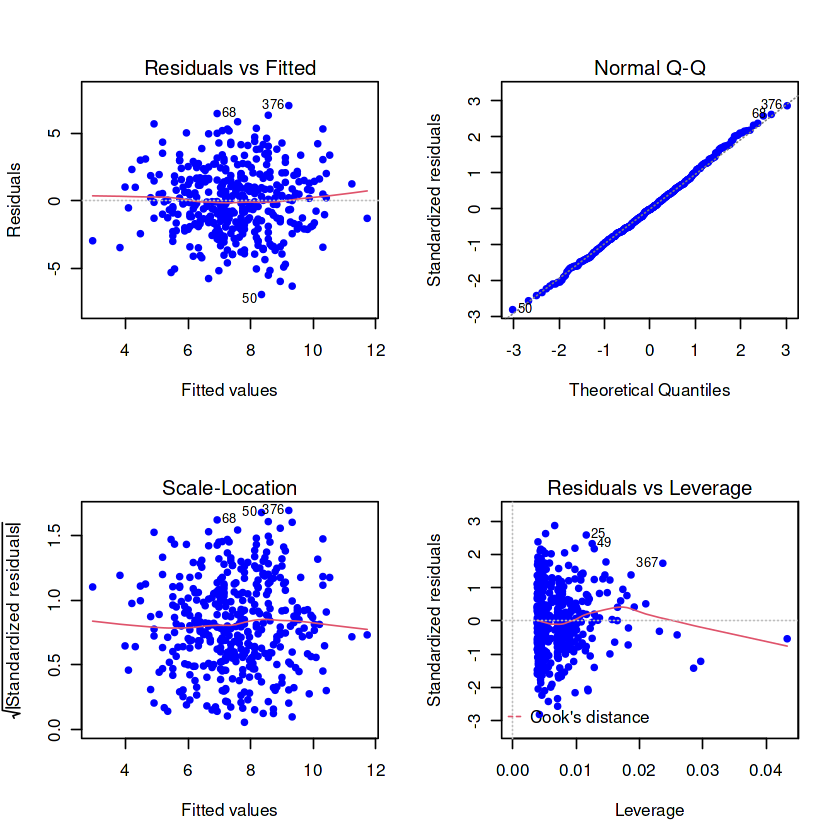

In [23]:
# to split the screen
par(mfrow = c(2, 2))
# to plot diagnostic plots
plot(model2,col="blue",pch=20)

The scale-location plot shows the residuals plotted against the fitted values, with the square root of the leverage on the x-axis. This plot can help you identify any outliers in the data. Since no data points can be found beyond-3 and 3( a rule of thumb), the data set seems to have no outliers.

Loading required package: ggplot2



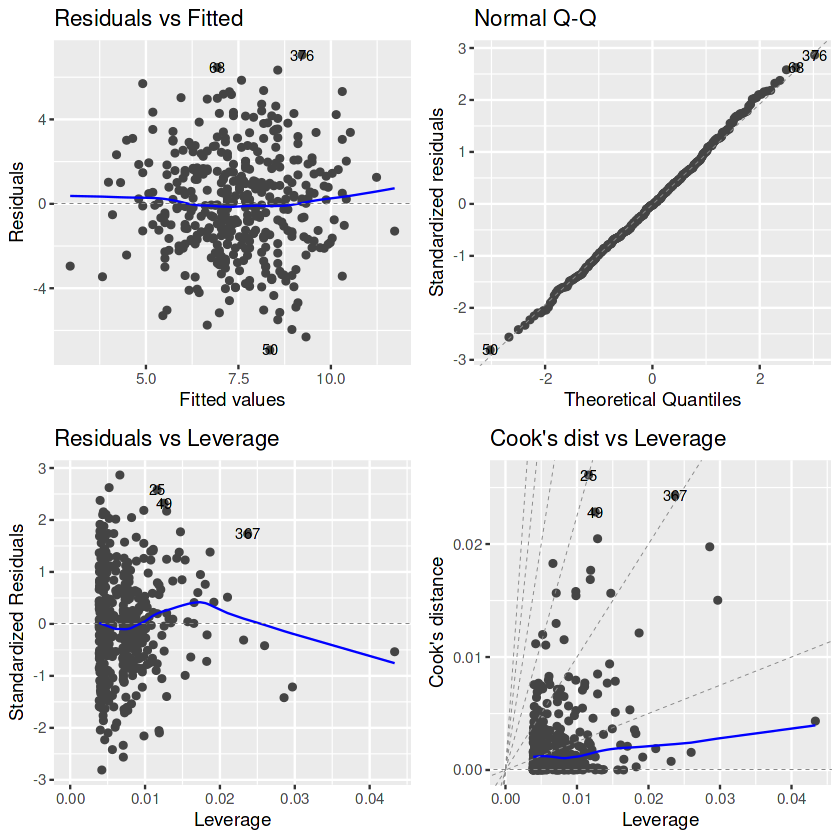

In [26]:
# alternate way
library(ggfortify)
autoplot(model2, which = c(1:2,5:6), label.size = 3)

Leverage is tested using Residual vs Leverage plot. The leverage plot shows the influence of each observation on the fit of the model. Observations with high leverage can have a disproportionate influence on the fit of the model. The Cook's distance takes into account both levearge and residuals. The plot shows the influence of each observation on the fit of the model, with observations with higher influence shown above the cooks line of 0.05. We can use the Cook's distnace to identify high levered points. According non of the data points fall below the line. So we can find **no levered points.**

In [36]:
# point with the highest leverage compared to others

hatvalues(model2)[order(hatvalues(model2), decreasing = T)][1]

42 
0.04333766